In [601]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import math
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from matplotlib.pyplot import figure

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_1364/653870862.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [602]:
df=pd.read_csv("Data/FoodBalanceSheets_E_All_Data/FoodBalanceSheets_E_All_Data_NOFLAG.csv", encoding="latin-1")

In [603]:
df.drop(["Area Code","Item Code","Element Code"],axis=1,inplace=True)
df

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,Population,Total Population - Both sexes,1000 persons,29186.00,30117.00,31161.00,32270.00,33371.00,34414.00,35383.00,36296.00,37172.00,38042.00
1,Afghanistan,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2170.00,2152.00,2159.00,2196.00,2265.00,2250.00,2228.00,2303.00,2270.00,2273.00
3,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,59.23,58.00,57.82,57.71,60.17,58.45,58.46,59.50,57.62,57.31
4,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,36.69,34.81,36.53,37.10,41.48,38.28,40.70,40.03,41.46,39.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319738,Net Food Importing Developing Countries,Miscellaneous,Food,1000 tonnes,787.00,839.00,921.00,935.00,958.00,992.00,1032.00,1066.00,1140.00,1199.00
319739,Net Food Importing Developing Countries,Miscellaneous,Food supply quantity (kg/capita/yr),kg,0.62,0.65,0.68,0.67,0.67,0.68,0.69,0.70,0.73,0.75
319740,Net Food Importing Developing Countries,Miscellaneous,Food supply (kcal/capita/day),kcal/capita/day,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
319741,Net Food Importing Developing Countries,Miscellaneous,Protein supply quantity (g/capita/day),g/capita/day,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [604]:
df.dropna(axis=0, inplace=True)

In [605]:
df=df.loc[~(df.iloc[:,4:]==0).all(axis=1)]

In [606]:
# df.Area.value_counts()[40:80]

In [607]:
# df.Item.value_counts()[:30]

In [608]:
df=df[df.Element=="Losses"]

In [609]:
def select(area,item ):
    data=df[df.Area==area]
    data=data[data['Item'].str.contains(item)]
    if len(data)>25:
        data=data[data.Item==item]
    return data

Plot graphs for each country

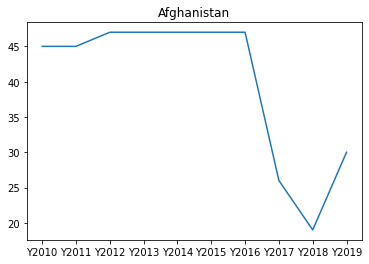

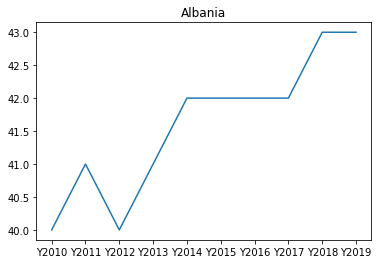

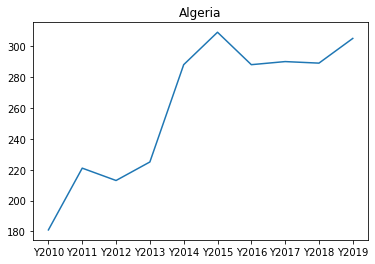

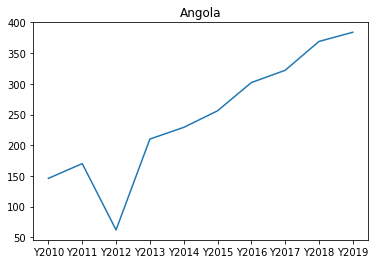

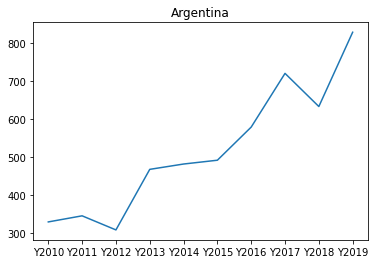

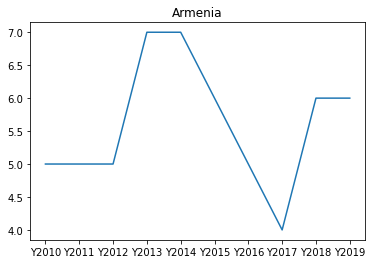

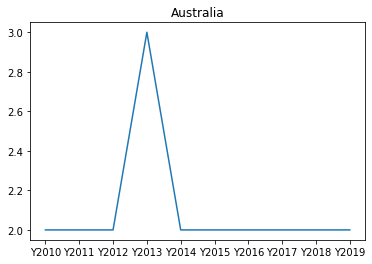

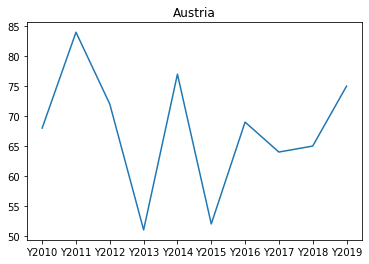

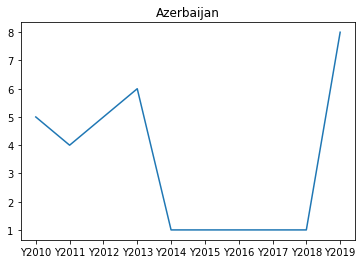

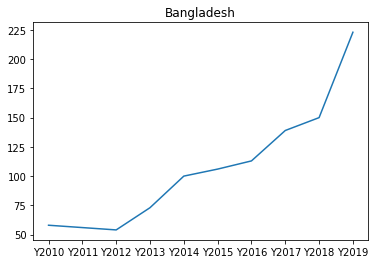

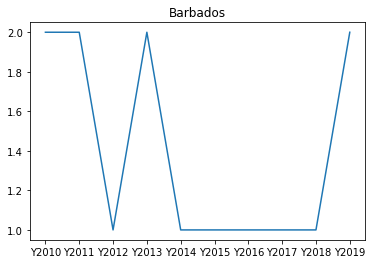

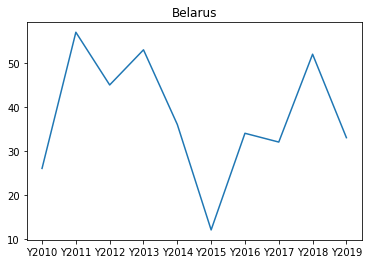

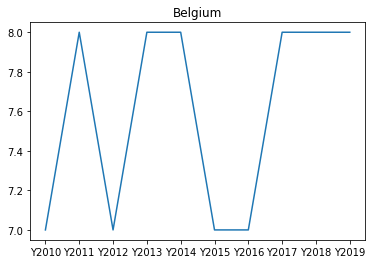

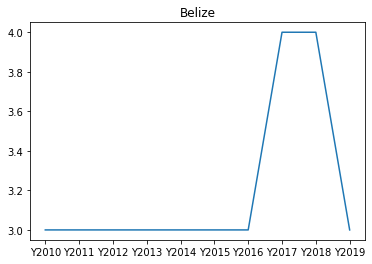

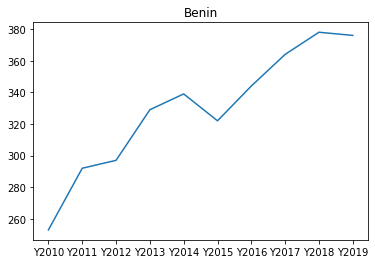

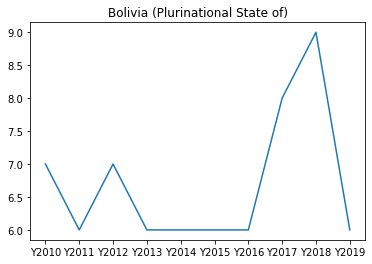

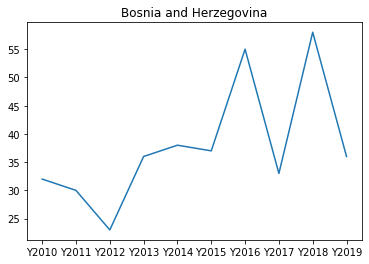

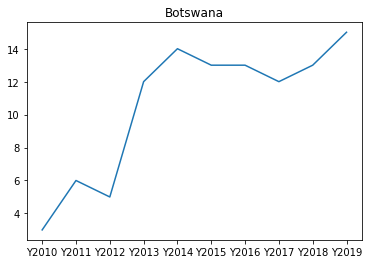

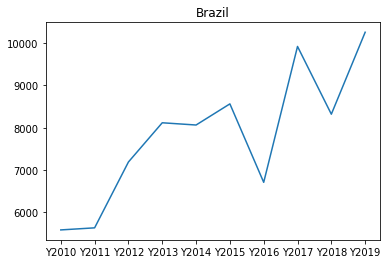

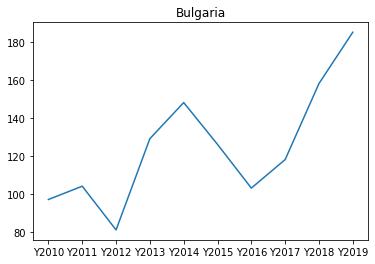

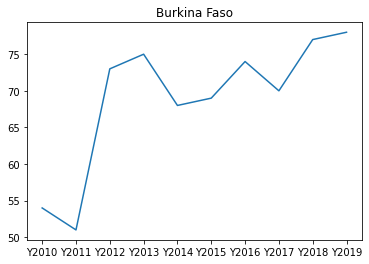

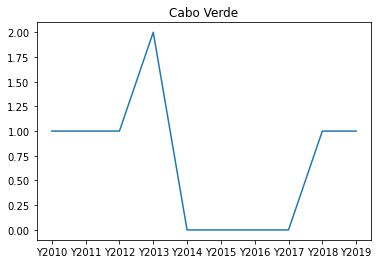

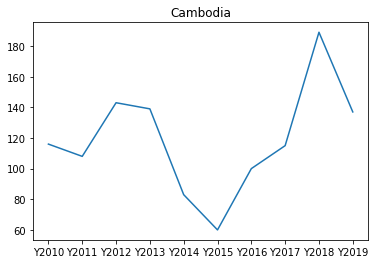

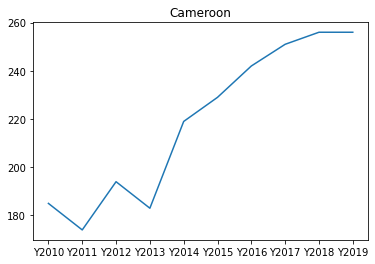

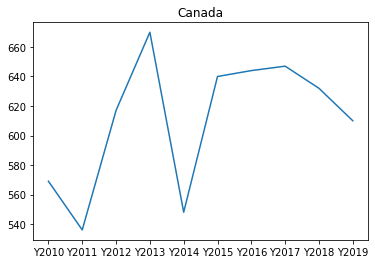

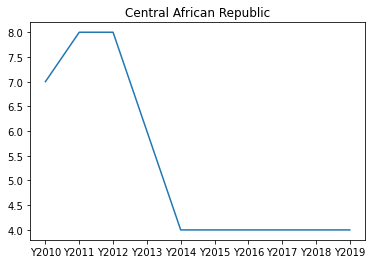

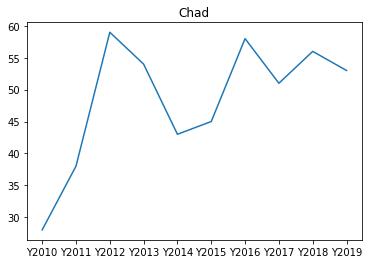

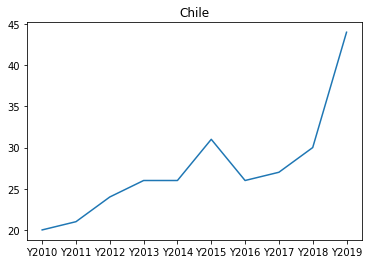

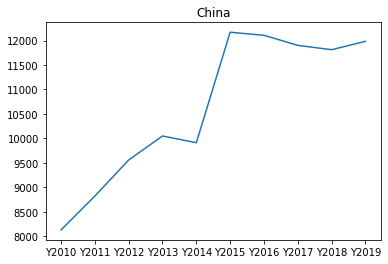

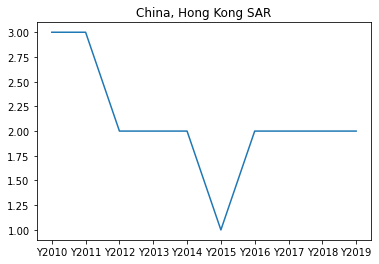

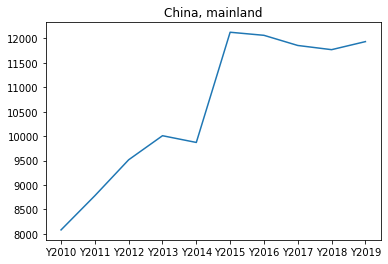

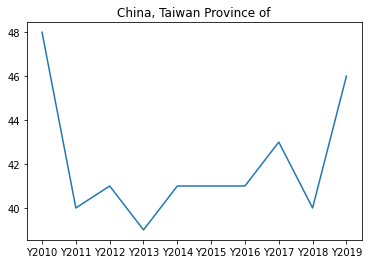

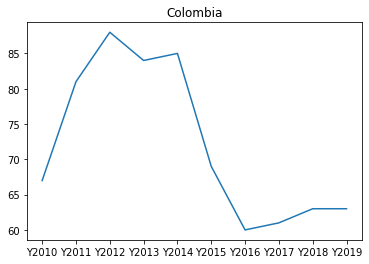

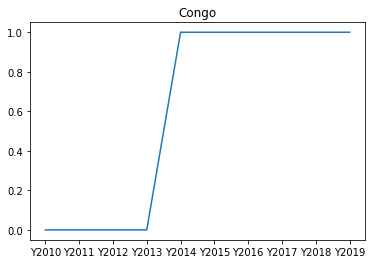

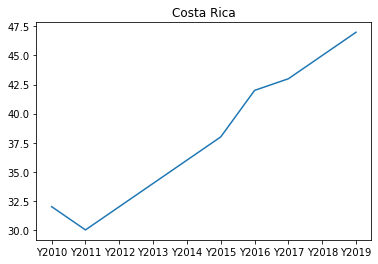

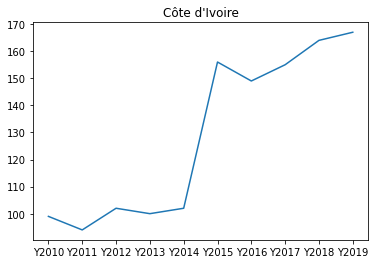

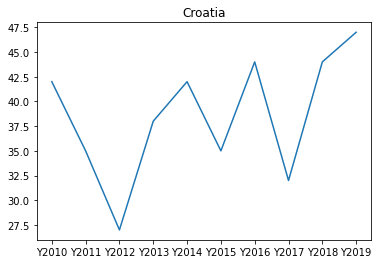

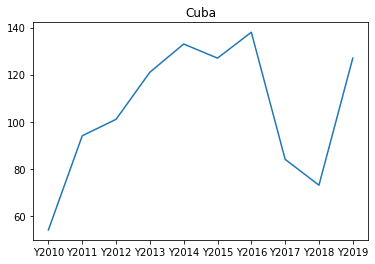

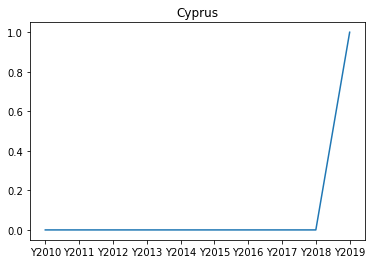

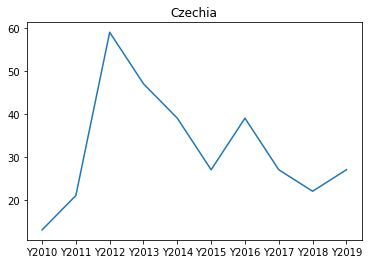

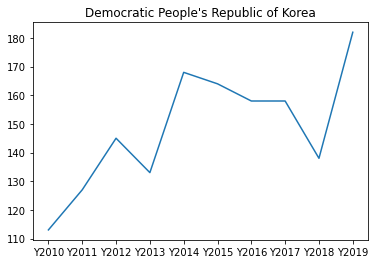

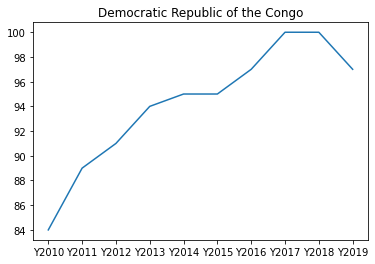

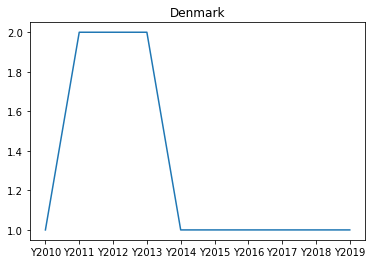

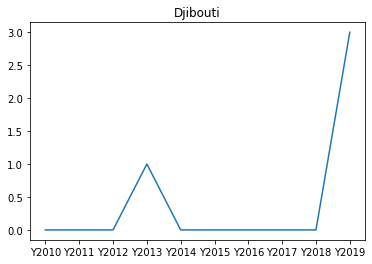

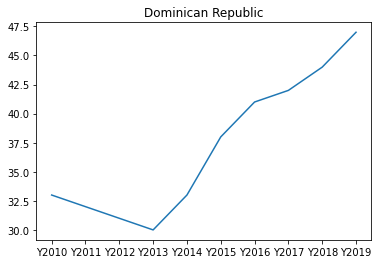

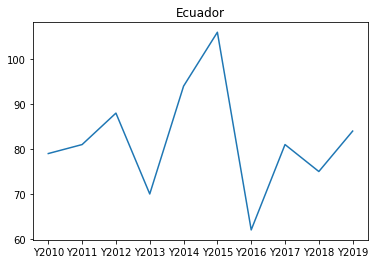

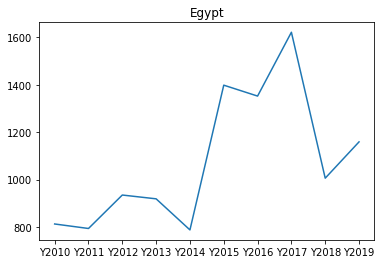

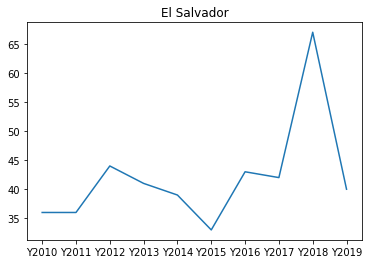

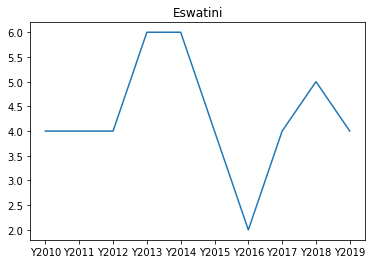

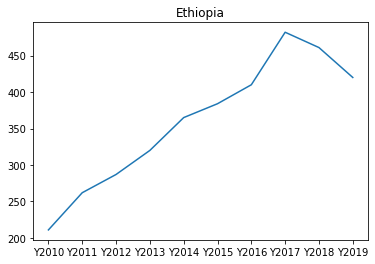

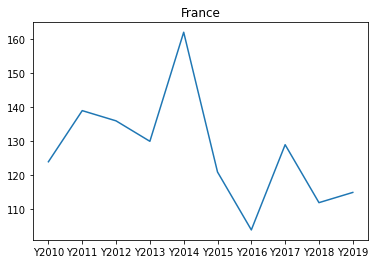

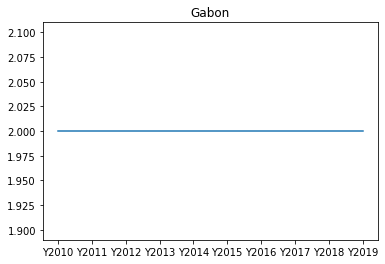

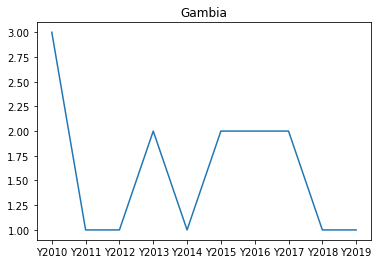

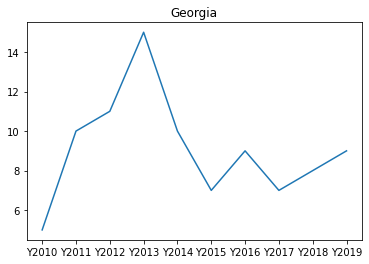

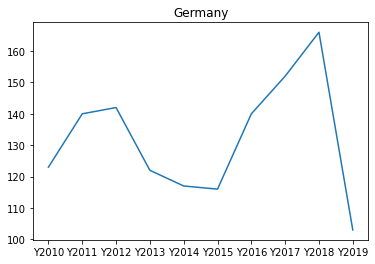

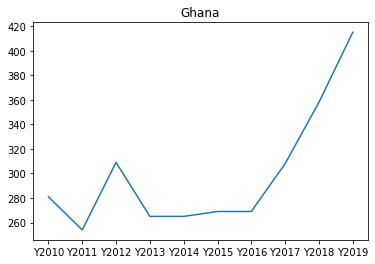

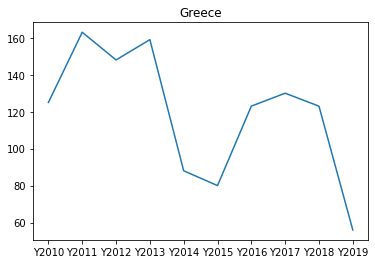

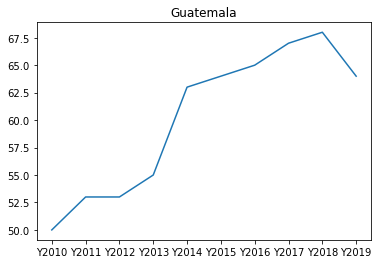

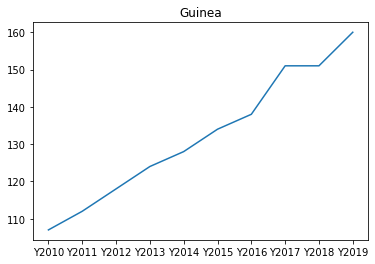

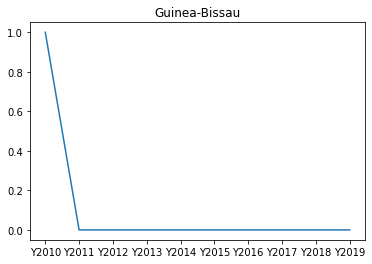

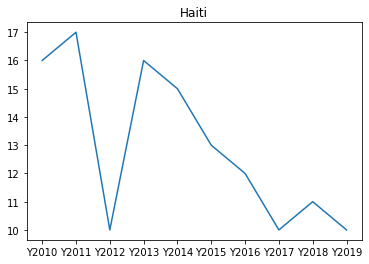

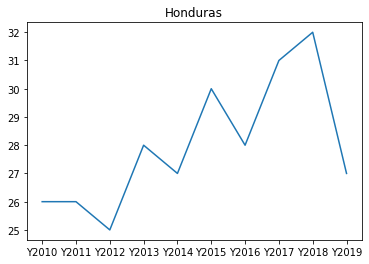

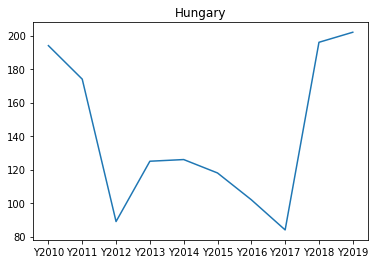

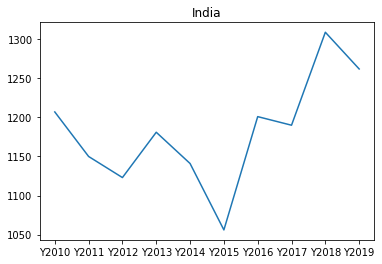

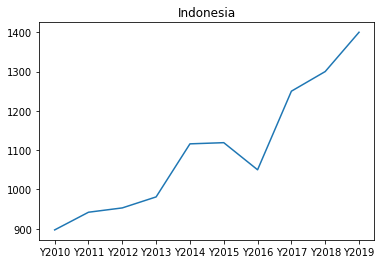

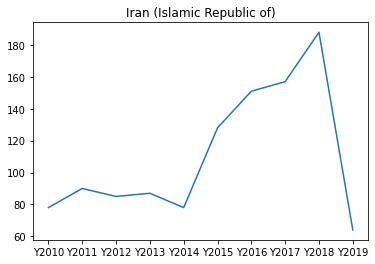

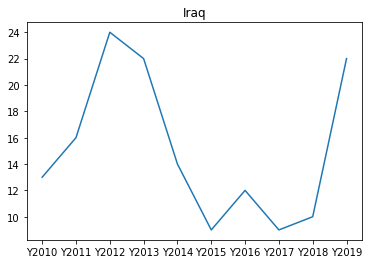

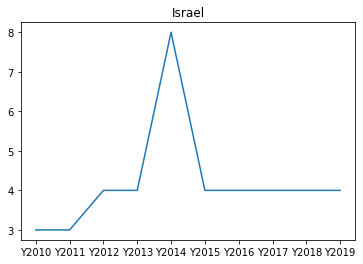

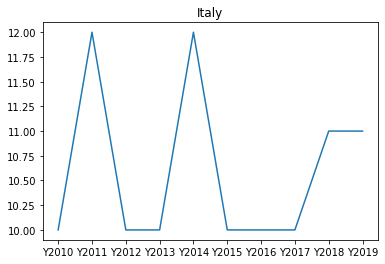

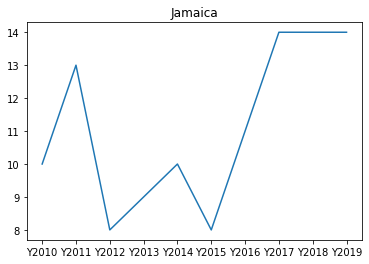

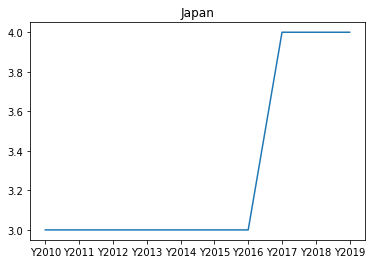

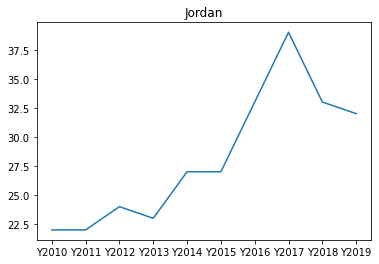

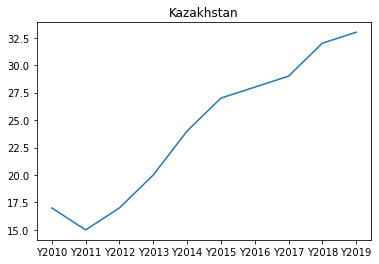

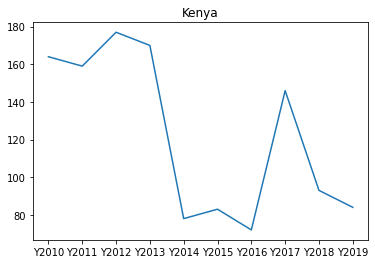

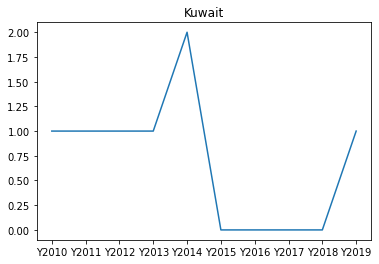

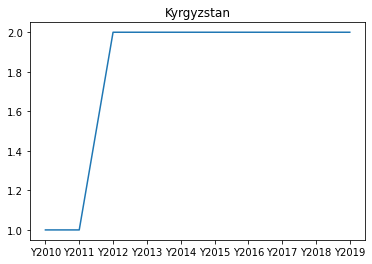

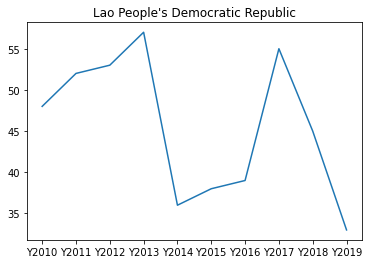

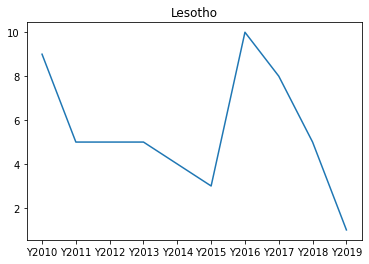

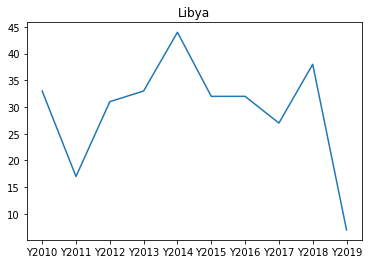

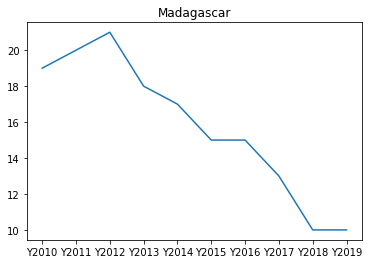

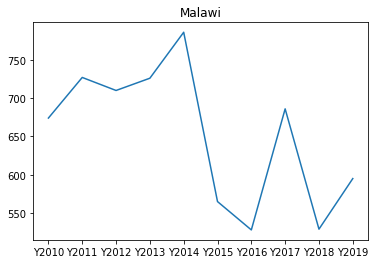

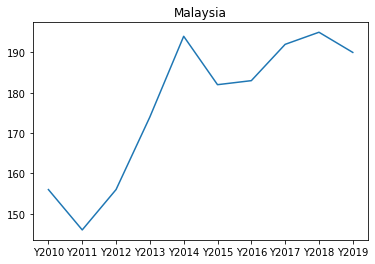

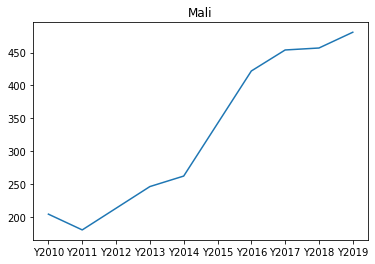

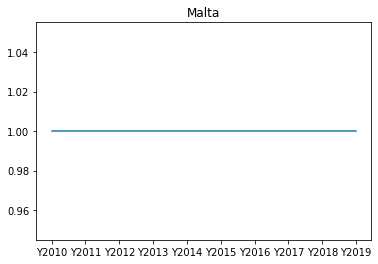

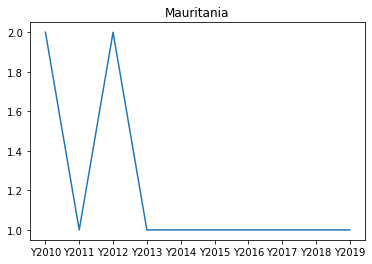

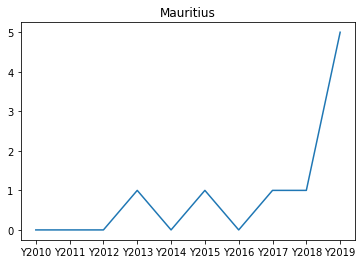

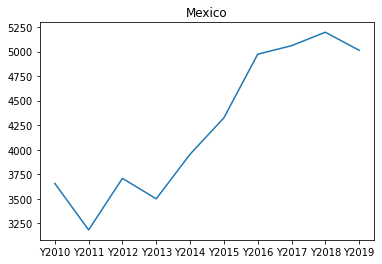

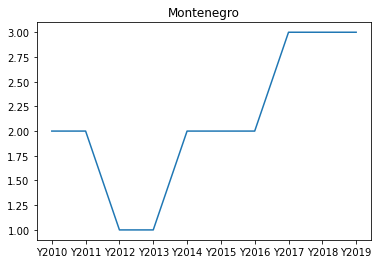

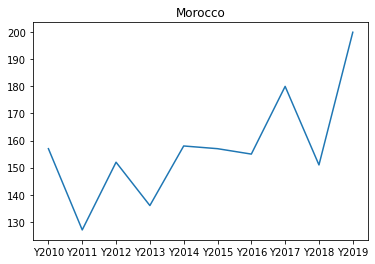

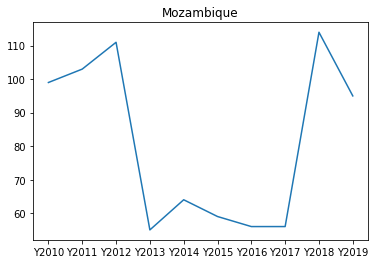

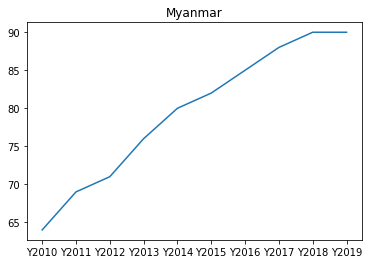

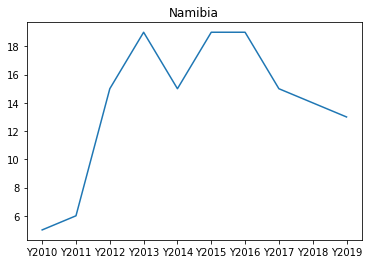

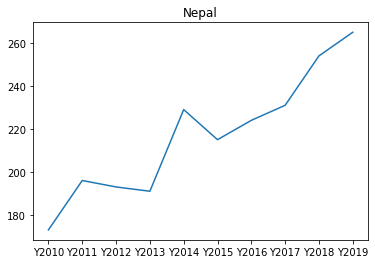

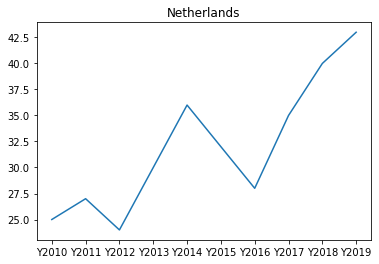

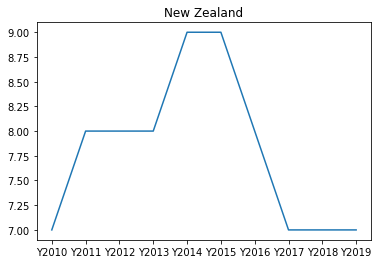

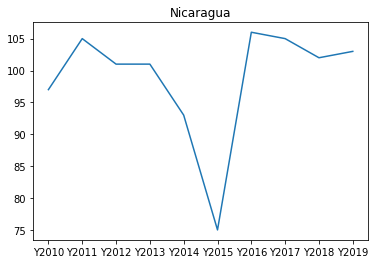

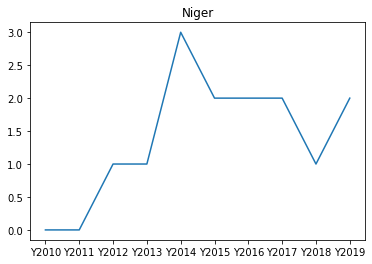

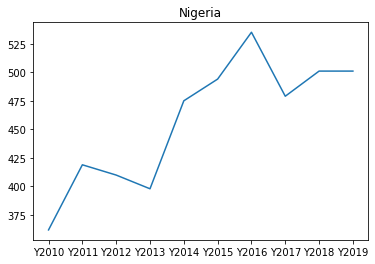

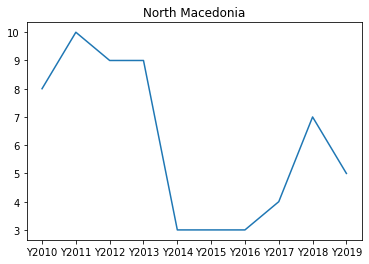

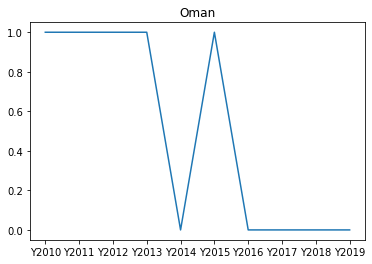

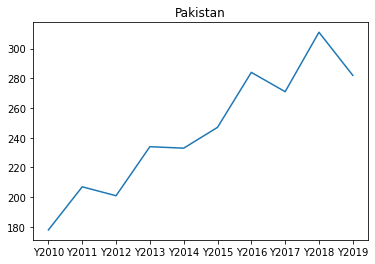

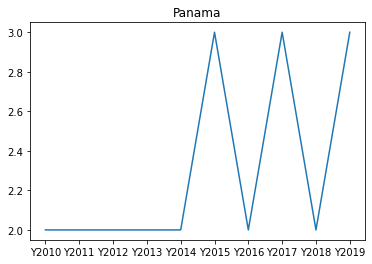

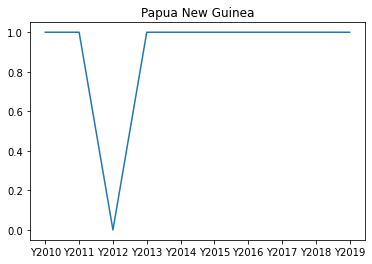

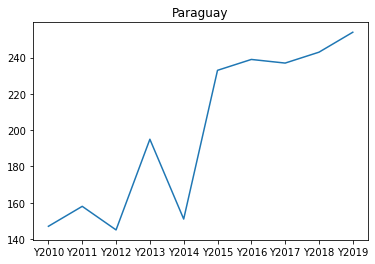

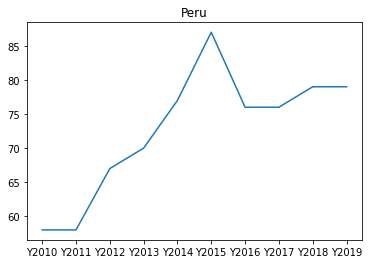

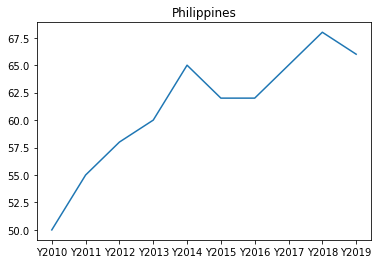

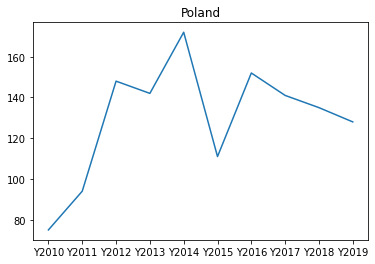

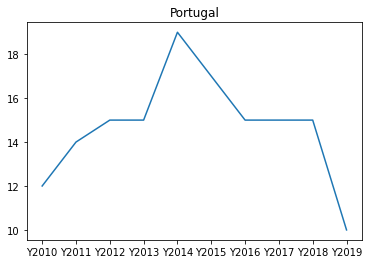

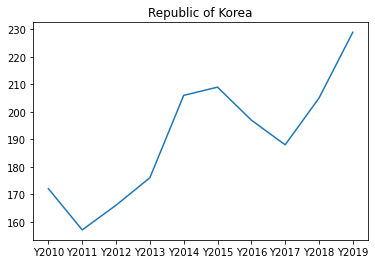

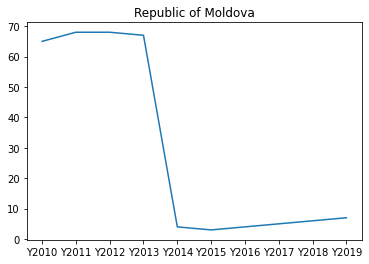

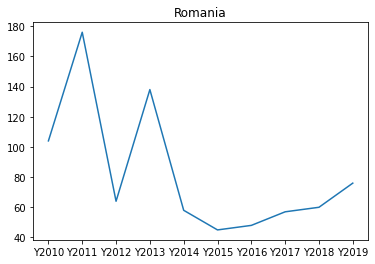

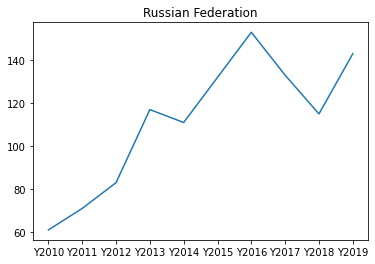

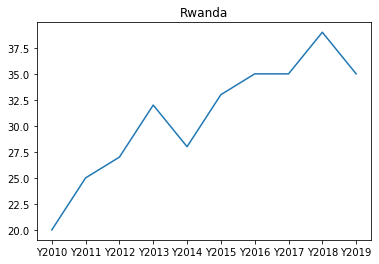

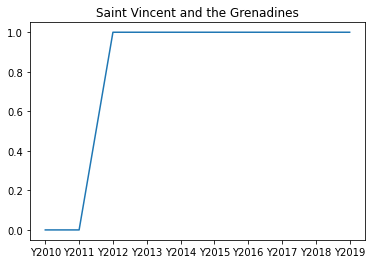

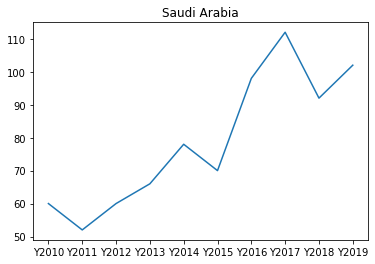

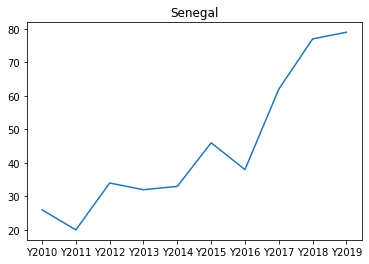

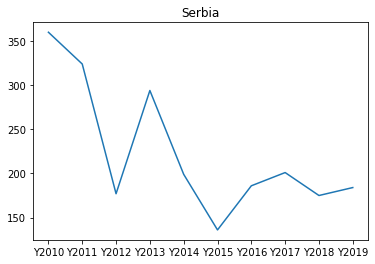

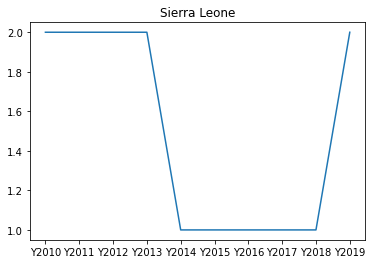

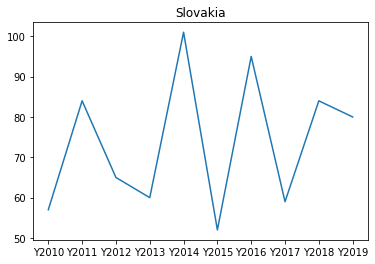

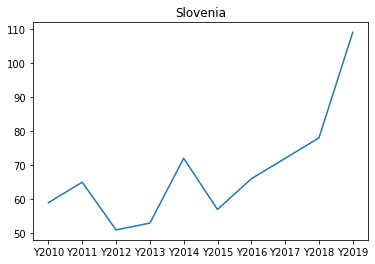

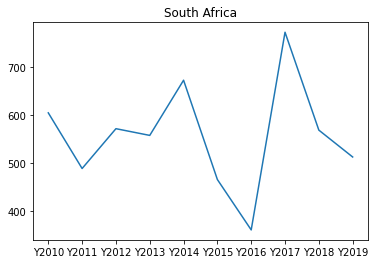

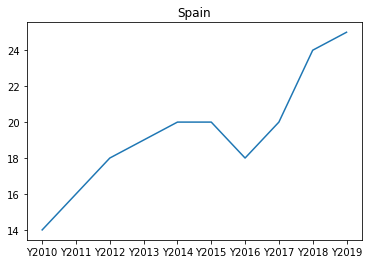

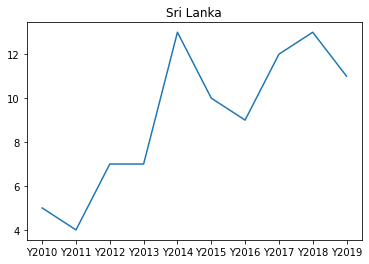

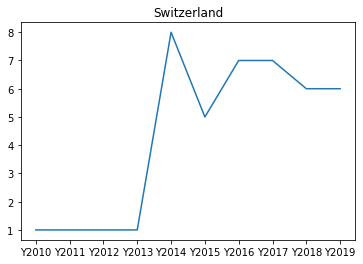

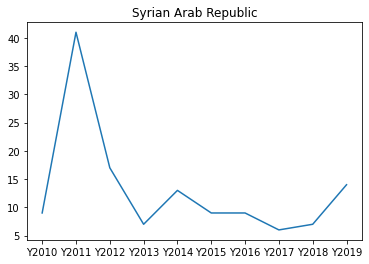

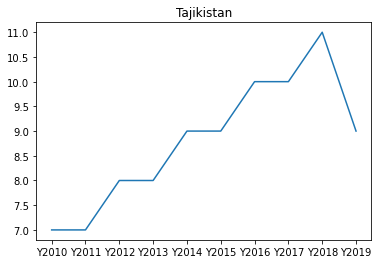

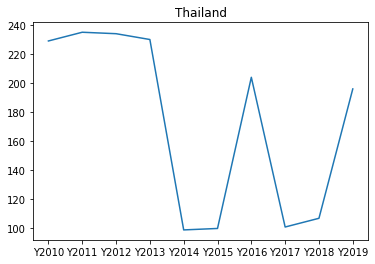

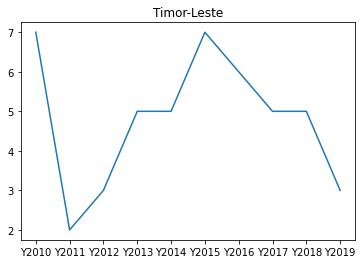

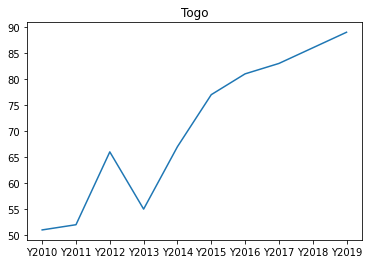

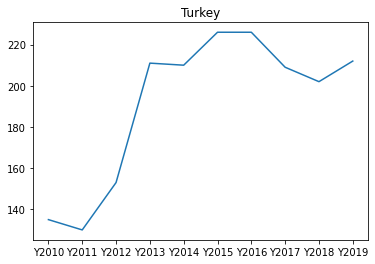

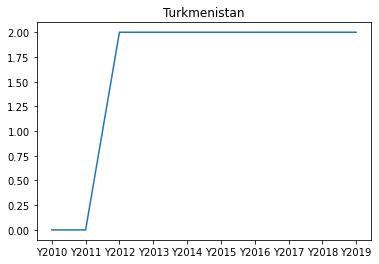

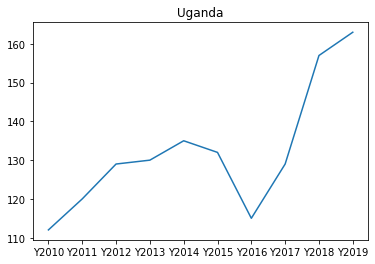

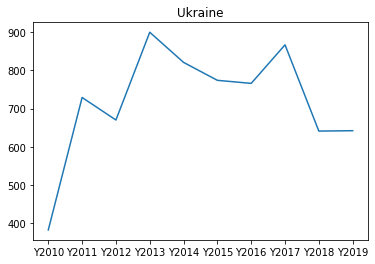

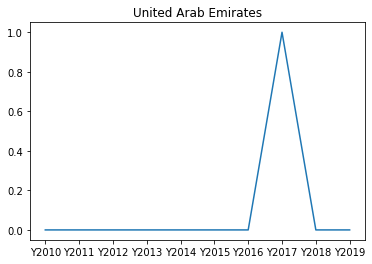

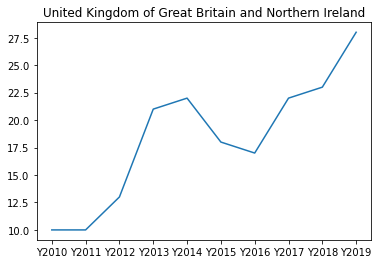

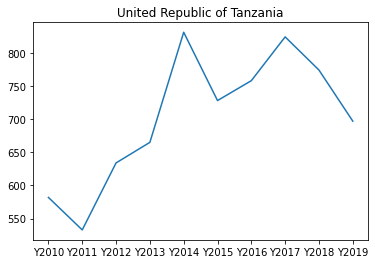

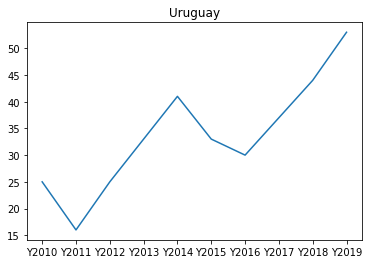

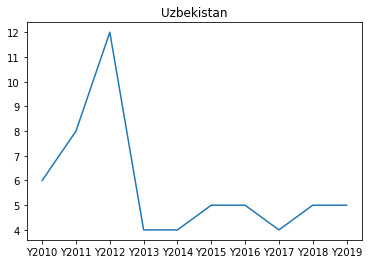

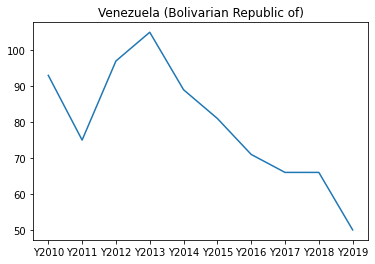

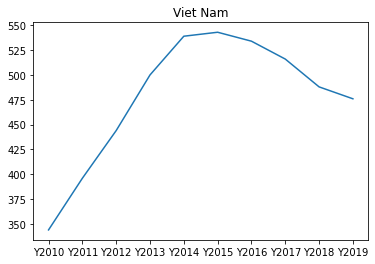

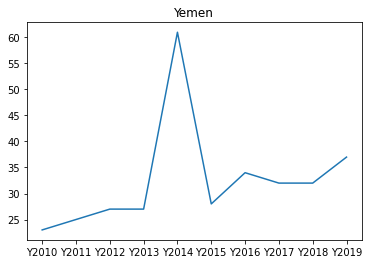

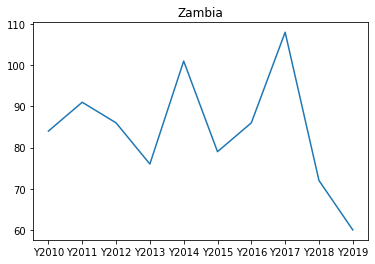

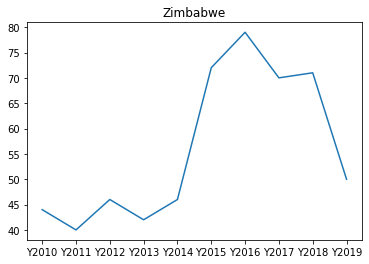

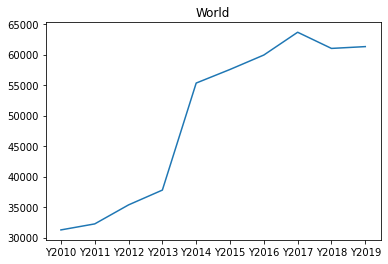

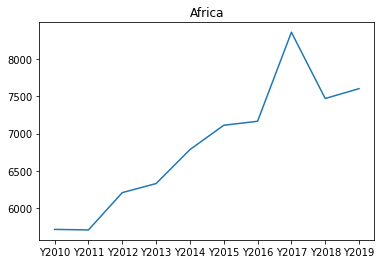

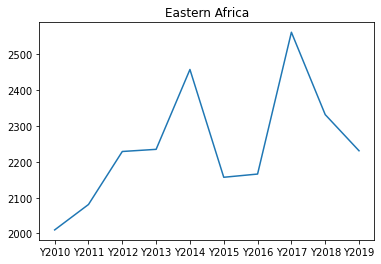

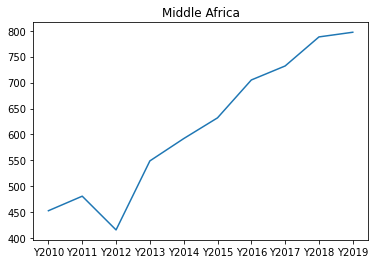

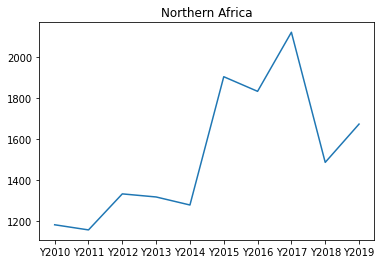

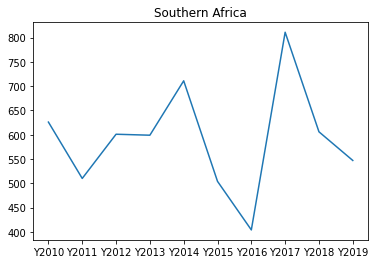

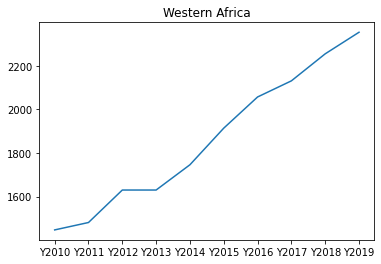

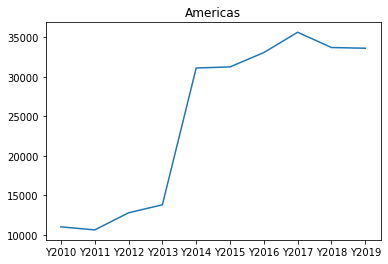

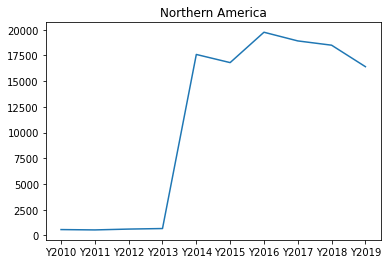

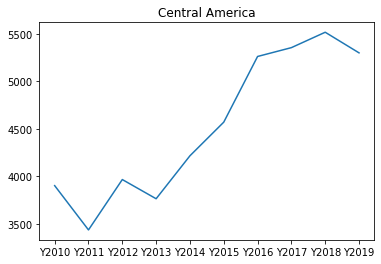

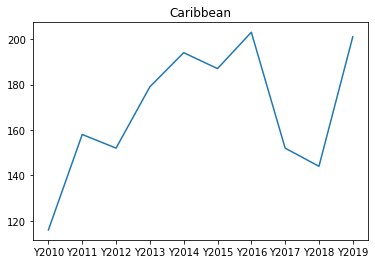

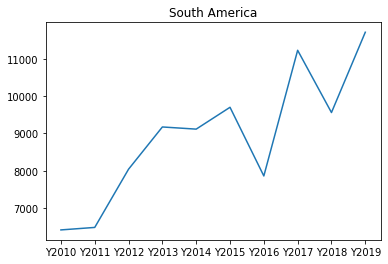

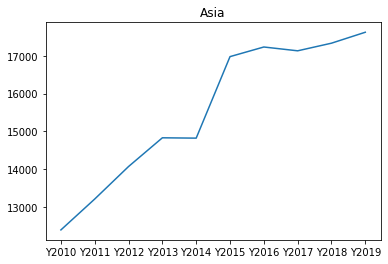

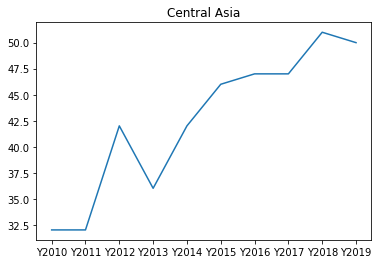

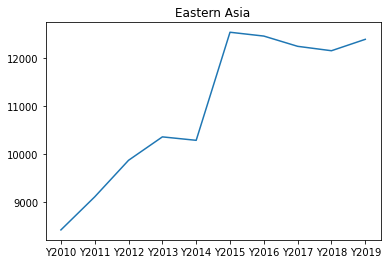

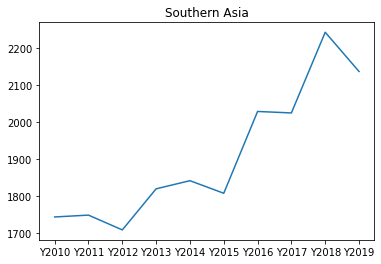

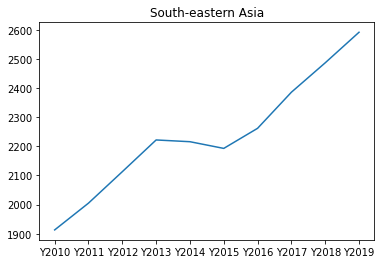

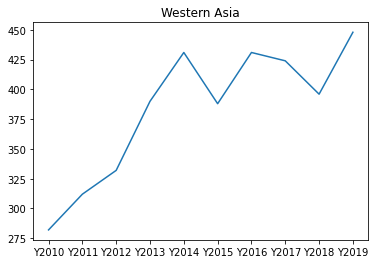

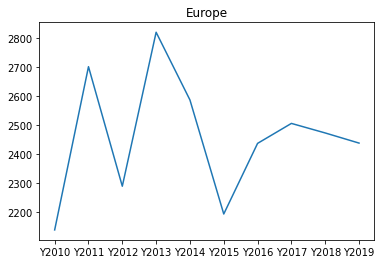

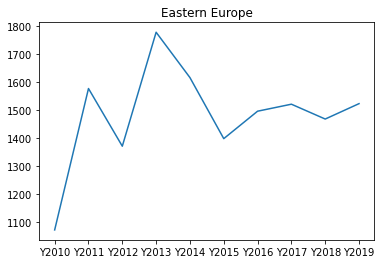

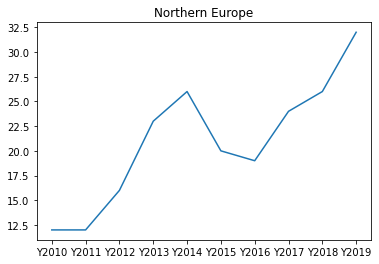

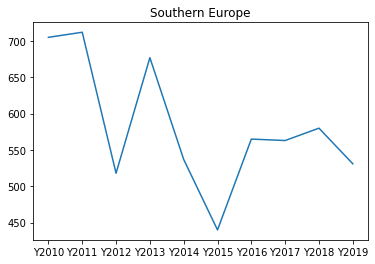

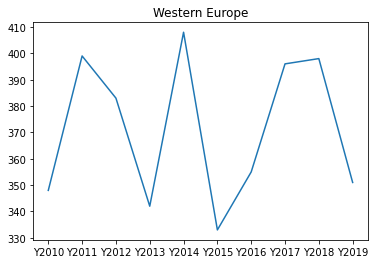

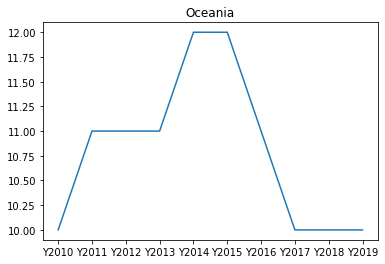

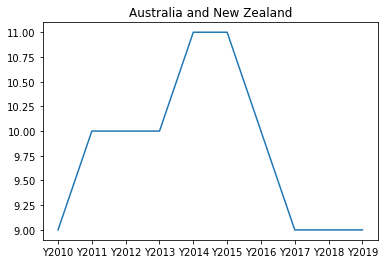

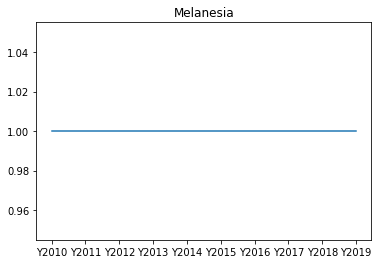

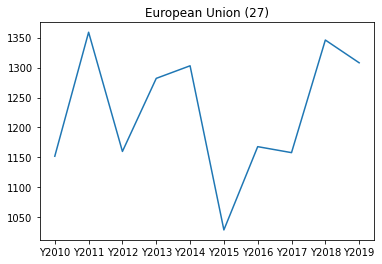

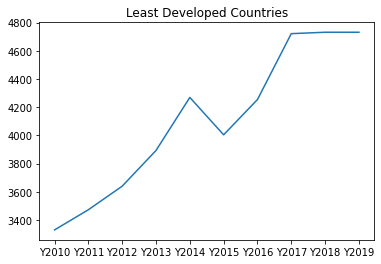

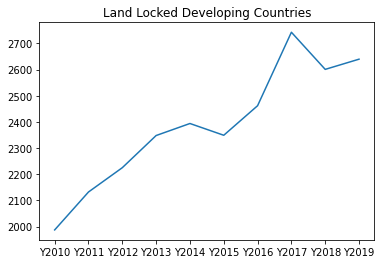

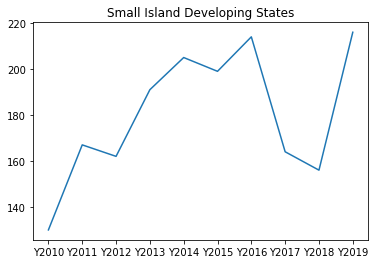

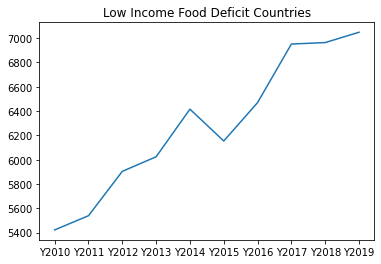

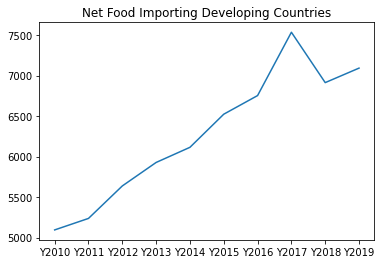

In [610]:
countries=[x for x in df.Area.unique()]
# countries=["Malawi"]
for i in countries:
    try:
        data=select(i,"Maize")
        losses=pd.DataFrame(data.iloc[0,4:])
        losses.columns=["Actual"]
        plt.plot(losses.index,losses["Actual"])
        plt.title(i)
        plt.show()
    except:
        pass

In [611]:
data=select("Malawi","Maize")
data

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
146029,Malawi,Maize and products,Losses,1000 tonnes,674.0,727.0,710.0,726.0,786.0,565.0,528.0,686.0,529.0,595.0


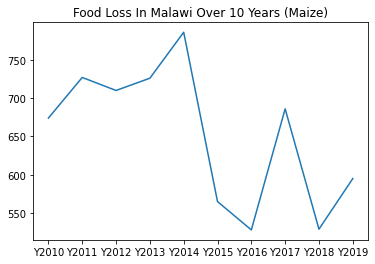

In [612]:
losses=pd.DataFrame(data.iloc[0,4:])
losses.columns=["Actual"]
plt.plot(losses.index,losses["Actual"])
plt.title("Food Loss In Malawi Over 10 Years (Maize)")
plt.show()

# MEAN-BASED PREDICTION

Calculate the loss value of an upcoming year based on the average of previous losses

In [613]:
# def mean_based(year):
#     try:
#         mean_pred=[]
#         losses=data[data.Element=="Losses"].iloc[0,4:]
#         count=0
#         sum=0
#         for i in losses.index:
#             if i=="Y"+str(year):
#                 break
#             sum=losses[i]+sum
#             count+=1
#         mean_pred=sum/count
#         return mean_pred
#     except:
#         return losses["Y"+str(year)]

def mean_based(year):
    try:
        mean_pred=[]
        losses=data[data.Element=="Losses"].iloc[0,4:]
        count=0
        sum=0
        for i in range(0,2):
            sum+=losses["Y"+str(year-i-1)]
            count+=1
        mean_pred=sum/count
        return mean_pred
    except:
        if year==2010:
            return losses["Y"+str(year)]
        if year==2011:
            return (losses["Y"+str(year-1)])
        if year==2012:
            return (losses["Y"+str(year-1)]+(losses["Y"+str(year-2)]))/2
        # if year==2013:
        #     return (losses["Y"+str(year-1)]+(losses["Y"+str(year-2)])+(losses["Y"+str(year-3)]))/3

In [614]:
def by_average(data):
    mean_based_pred=[]
    losses=pd.DataFrame(data[data.Element=="Losses"].iloc[0,4:])
    losses.columns=["Actual"]
    losses["MeanBasedPred"]=np.zeros([len(losses)])
    for i in losses.index:
        losses["MeanBasedPred"][i]=mean_based(int(i[1:]))
    losses.reset_index()
    MSE = np.square(np.subtract(losses["Actual"].values,losses["MeanBasedPred"].values)).mean() 
    RMSE = math.sqrt(MSE)
    MAPE= np.mean(np.abs((losses["MeanBasedPred"].values - losses["Actual"].values) /losses["Actual"].values))*100
    print("RMSE =",RMSE)
    print("MAPE =",np.mean(np.abs((losses["Actual"].values - losses["MeanBasedPred"].values)/losses["Actual"].values))*100)
    return losses, MSE, RMSE, MAPE

In [615]:
losses,mse_mean,rmse_mean,mape_mean=by_average(data)
mse_mean,rmse_mean,mape_mean

RMSE = 95.66464864305937
MAPE = 11.72345539605082


/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_1364/3085655691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses["MeanBasedPred"][i]=mean_based(int(i[1:]))


(9151.725, 95.66464864305937, 11.72345539605082)

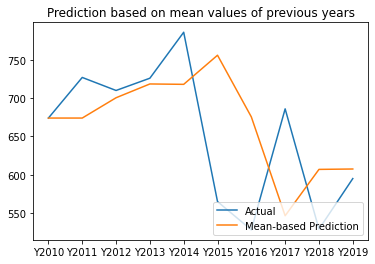

In [616]:
plt.plot(losses.index,losses["Actual"])
plt.plot(losses.index,losses.MeanBasedPred)
plt.title("Prediction based on mean values of previous years")
plt.legend(['Actual', 'Mean-based Prediction'], loc='lower right')

In [619]:
# population=df[df["Element"]=="Total Population - Both sexes"]
# population=population[population.Area=="China"].iloc[0,4:]*1000
# lstm_data=pd.DataFrame(population)
# lstm_data.columns=["Population"]
lstm_data["Actual Loss"]=losses["Actual"]

# ARIMA MODEL

/Users/murathansaygili/Desktop/SIC/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=717.905317, expected=528.000000
predicted=530.938908, expected=686.000000
predicted=660.306964, expected=529.000000
predicted=589.281668, expected=595.000000
Test RMSE: 139.088
Test MAPE = 21.088342571786928


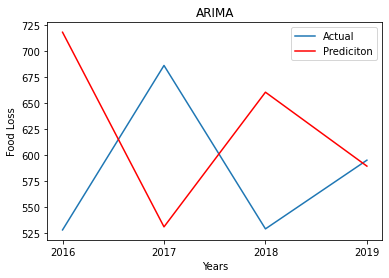

In [620]:
def by_arima(data):
	series=data
	X = series.values
	# size = int(len(X) * 0.66)
	size=6
	train, test = X[0:size], X[size:len(X)]
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		model = ARIMA(history, order=(1,1,0))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
	# evaluate forecasts
	arima_mape=np.mean(np.abs((test - predictions)/test))*100
	rmse = sqrt(mean_squared_error(test, predictions))
	print('Test RMSE: %.3f' % rmse)
	print("Test MAPE =", arima_mape)
	return predictions, train,test, rmse,arima_mape
predictions, train,test, rmse_arima, arima_mape=by_arima(lstm_data["Actual Loss"])
# plot forecasts against actual outcomes
years=['2016','2017','2018','2019']
pyplot.plot(years,test)
pyplot.plot(predictions, color='red')
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.legend(["Actual","Prediciton"])
plt.title("ARIMA")
# plt.ylim(23000,26000)
pyplot.show()

predicted=568.828455, expected=674.000000
predicted=647.140238, expected=727.000000
predicted=711.535779, expected=710.000000
predicted=715.008944, expected=726.000000
predicted=721.232069, expected=786.000000
predicted=768.555095, expected=565.000000
predicted=647.930422, expected=528.000000
predicted=536.545457, expected=686.000000
predicted=644.943908, expected=529.000000
predicted=583.413314, expected=595.000000


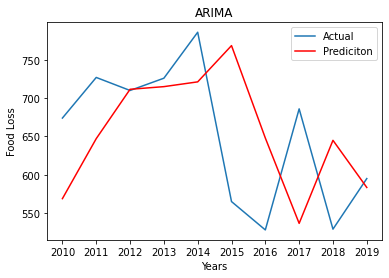

In [621]:
predictions = list()
history = [x for x in lstm_data["Actual Loss"]]
for t in range(len(lstm_data["Actual Loss"])):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = lstm_data["Actual Loss"][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
pyplot.plot(years,lstm_data["Actual Loss"])
pyplot.plot(predictions, color='red')
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.legend(["Actual","Prediciton"])
plt.title("ARIMA")
# plt.ylim(23000,26000)
pyplot.show()

In [622]:
def df_to_X_y(df, window_size=2):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [623]:
WINDOW_SIZE = 2
X1, y1 = df_to_X_y(lstm_data["Actual Loss"], WINDOW_SIZE)
X1.shape, y1.shape

((8, 2, 1), (8,))

In [624]:
X_train1, y_train1 = X1[:4], y1[:4]
X_val1, y_val1 = X1[4:6], y1[4:6]
X_test1, y_test1 = X1[6:], y1[6:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4, 2, 1), (4,), (2, 2, 1), (2,), (2, 2, 1), (2,))

Data Scaling

In [625]:
scalers = {}
for i in range(X_train1.shape[1]):
    scalers[i] = StandardScaler()
    X_train1[:, i, :] = scalers[i].fit_transform(X_train1[:, i, :]) 

for i in range(X_test1.shape[1]):
    X_test1[:, i, :] = scalers[i].transform(X_test1[:, i, :]) 

# LSTM MODEL

In [626]:
def by_lstm(X_train1, y_train1,X_val1,y_val1):
    model1 = Sequential()
    model1.add(InputLayer((2, 1)))
    model1.add(LSTM(64))
    model1.add(Dense(50, 'relu'))
    model1.add(Dense(50, 'relu'))
    model1.add(Dense(1, 'linear'))

    # model1.summary()

    cp1 = ModelCheckpoint('model1/', save_best_only=True)
    model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[MeanAbsolutePercentageError()])

    model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp1])
    return model1
model1=by_lstm(X_train1, y_train1, X_val1,y_val1)

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 492009.5000 - mean_absolute_percentage_error: 99.9955

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 6s 6s/step - loss: 492009.5000 - mean_absolute_percentage_error: 99.9955 - val_loss: 3374950383616.0000 - val_mean_absolute_percentage_error: 307869.5625
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 34501891719168.0000 - mean_absolute_percentage_error: 790447.3125

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 34501891719168.0000 - mean_absolute_percentage_error: 790447.3125 - val_loss: 1884055928832.0000 - val_mean_absolute_percentage_error: 230028.0469
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 9716879065088.0000 - mean_absolute_percentage_error: 389631.4375

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 9716879065088.0000 - mean_absolute_percentage_error: 389631.4375 - val_loss: 1005221183488.0000 - val_mean_absolute_percentage_error: 168018.4688
Epoch 4/200
1/1 [==============================] - 0s 34ms/step - loss: 3134254743552.0000 - mean_absolute_percentage_error: 226530.5781 - val_loss: 1631521079296.0000 - val_mean_absolute_percentage_error: 214054.0781
Epoch 5/200
1/1 [==============================] - 0s 41ms/step - loss: 53430894592.0000 - mean_absolute_percentage_error: 16389.8320 - val_loss: 5910123511808.0000 - val_mean_absolute_percentage_error: 407405.6875
Epoch 6/200
1/1 [==============================] - 0s 38ms/step - loss: 1299295.5000 - mean_absolute_percentage_error: 164.1338 - val_loss: 11097479315456.0000 - val_mean_absolute_percentage_error: 558266.4375
Epoch 7/200
1/1 [==============================] - 0s 29ms/step - loss: 1561782.5000 - mean_absolute_percentage_error: 180.1827 - val_loss: 1895873642496

In [627]:
# model1 = load_model('model1/')

In [628]:
test_predictions_x=tf.convert_to_tensor(X1, dtype=tf.int64)
train_predictions = model1.predict(test_predictions_x).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1})
train_results

1/1 [==============================] - 0s 356ms/step


,Train Predictions,Actuals
0,6.967521e+02,710.0
1,6.967521e+02,726.0
2,6.967521e+02,786.0
3,6.967521e+02,565.0
4,-2.513005e+07,528.0
5,-2.513005e+07,686.0
6,6.967521e+02,529.0
7,6.967521e+02,595.0


In [629]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1/1 [==============================] - 0s 333ms/step


,Train Predictions,Actuals
0,696.752075,710.0
1,696.752075,726.0
2,696.752075,786.0
3,696.752075,565.0


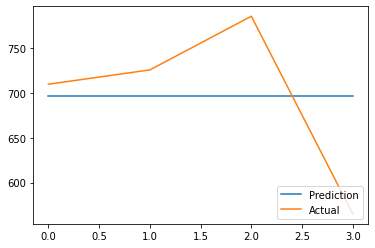

In [630]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
plt.legend(['Prediction', 'Actual'], loc='lower right')

In [631]:
val_predictions2 = model1.predict(X_val1).flatten()
val_results2 = pd.DataFrame(data={'Val Predictions':val_predictions2, 'Actuals':y_val1})
val_results2

1/1 [==============================] - 0s 15ms/step


,Val Predictions,Actuals
0,-25130046.0,528.0
1,-25130046.0,686.0


In [632]:
# plt.plot(val_results['Val Predictions'])
# plt.plot(val_results['Actuals'])

In [633]:
test_predictions2 = model1.predict(X_test1).flatten()
test_results2 = pd.DataFrame(data={'Train Predictions':test_predictions2, 'Actuals':y_test1})
test_results2

1/1 [==============================] - 0s 15ms/step


,Train Predictions,Actuals
0,696.752075,529.0
1,696.752075,595.0


In [634]:
lstm_mape=np.mean(np.abs((y_test1 - test_predictions2)/y_test1))*100
print("MAPE =",lstm_mape)

MAPE = 24.406178221081674


dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


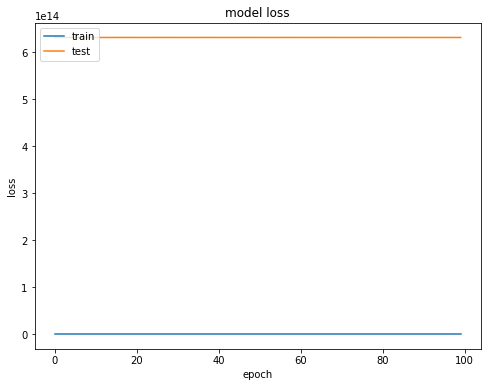

In [635]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)  #..., callbacks=[cp1], verbose=0)
print(history.history.keys())

figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [655]:
losses_new_2=losses.copy()
for i in [2020,2021,2022]:
    new=asarray([[[losses_new_2["Actual"].loc["Y"+str(i-2)]],[losses_new_2["Actual"].loc["Y"+str(i-1)]]]])
    new[0]=scalers[1].transform(new[0])
    new=tf.convert_to_tensor(new, dtype=tf.int64)
    new_out=model1.predict(new).flatten()
    new_out=pd.DataFrame(new_out, index=["Y"+str(i)], columns=["Actual"])
    losses_new_2=pd.concat([losses_new_2,new_out])

1/1 [==============================] - 0s 24ms/step


In [656]:
losses_new_2

,Actual,MeanBasedPred
Y2010,674.0,674.0
Y2011,727.0,674.0
Y2012,710.0,700.5
Y2013,726.0,718.5
Y2014,786.0,718.0
Y2015,565.0,756.0
Y2016,528.0,675.5
Y2017,686.0,546.5
Y2018,529.0,607.0
Y2019,595.0,607.5


# GRU MODEL

In [636]:
def by_gru():
    model3 = Sequential()
    model3.add(InputLayer((2, 1)))
    model3.add(GRU(64))
    model3.add(Dense(50, 'relu'))
    model3.add(Dense(50, 'relu'))
    model3.add(Dense(1, 'linear'))
    model3.summary()

    cp3 = ModelCheckpoint('model3/', save_best_only=True)
    model3.compile(loss=MeanAbsolutePercentageError(), optimizer=Adam(learning_rate=0.1), metrics=[MeanAbsolutePercentageError()])
    return model3

model3=by_gru()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 64)                12864     
                                                                 
 dense_51 (Dense)            (None, 50)                3250      
                                                                 
 dense_52 (Dense)            (None, 50)                2550      
                                                                 
 dense_53 (Dense)            (None, 1)                 51        
                                                                 
Total params: 18,715
Trainable params: 18,715
Non-trainable params: 0
_________________________________________________________________


In [637]:
history=model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp3])

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 99.9987 - mean_absolute_percentage_error: 99.9987 - val_loss: 95.6493 - val_mean_absolute_percentage_error: 95.6493
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 99.2126 - mean_absolute_percentage_error: 99.2126 - val_loss: 69.7479 - val_mean_absolute_percentage_error: 69.7479
Epoch 3/200
1/1 [==============================] - 0s 22ms/step - loss: 89.8004 - mean_absolute_percentage_error: 89.8004 - val_loss: 18.8001 - val_mean_absolute_percentage_error: 18.8001
Epoch 4/200
1/1 [==============================] - 0s 23ms/step - loss: 47.6538 - mean_absolute_percentage_error: 47.6538 - val_loss: 75.1168 - val_mean_absolute_percentage_error: 75.1168
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 58.2063 - mean_absolute_percentage_error: 58.2063 - val_loss: 29.1912 - val_mean_absolute_percentage_error: 29.1912
Epoch 6/200
1/1 [==============================] - 0s 23ms/ste

In [638]:
# model3 = load_model('model3/')
train_predictions3 = model3.predict(X_train1).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions':train_predictions3, 'Actuals':y_train1})
train_results3

1/1 [==============================] - 0s 312ms/step


,Train Predictions,Actuals
0,702.400940,710.0
1,740.962891,726.0
2,787.988525,786.0
3,583.756714,565.0


Text(0.5, 1.0, 'GRU')

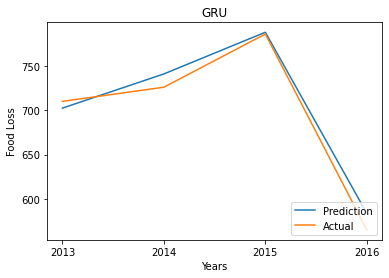

In [639]:
train_results3.index=['2013','2014','2015','2016']
plt.plot(train_results3['Train Predictions'])
plt.plot(train_results3['Actuals'])

plt.legend(['Prediction', 'Actual'], loc='lower right')
# plt.ylim(20000,,30000)
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.title("GRU")
# plt.ylim(20000,28000)

1/1 [==============================] - 0s 15ms/step


Text(0.5, 1.0, 'GRU')

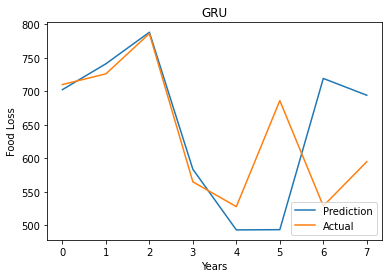

In [640]:
train_results3.index=['2013','2014','2015','2016']
gru_preds = model3.predict(X1).flatten()
gru_results = pd.DataFrame(data={'Train Predictions':gru_preds, 'Actuals':y1})

plt.plot(gru_results['Train Predictions'])
plt.plot(gru_results['Actuals'])

plt.legend(['Prediction', 'Actual'], loc='lower right')
# plt.ylim(20000,,30000)
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.title("GRU")
# plt.ylim(20000,28000)

In [641]:
# # history = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)
# print(history.history.keys())


# figure(figsize=(8, 6))
# plt.plot(history.history['mean_absolute_percentage_error'])
# plt.plot(history.history['val_mean_absolute_percentage_error'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [642]:
val_predictions3 = model3.predict(X_val1).flatten()
val_results3 = pd.DataFrame(data={'Val Predictions':val_predictions3, 'Actuals':y_val1})
val_results3

1/1 [==============================] - 0s 16ms/step


,Val Predictions,Actuals
0,493.282715,528.0
1,493.649628,686.0


In [643]:
X_test1

array([[[-8.45369681],
        [-1.77073207]],

       [[-1.08440525],
        [-7.1952186 ]]])

In [644]:
new

<tf.Tensor: shape=(1, 2, 1), dtype=int64, numpy=
array([[[-3],
        [ 5]]])>

In [645]:
# test_predictions3=tf.convert_to_tensor(test_predictions3, dtype=tf.int64)
test_predictions3 = model3.predict(X_test1).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions':test_predictions3, 'Actuals':y_test1})
test_results3

1/1 [==============================] - 0s 26ms/step


,Test Predictions,Actuals
0,719.116699,529.0
1,694.074280,595.0


In [646]:
gru_mape=np.mean(np.abs((y_test1 - test_predictions3)/y_test1))*100

In [647]:
gru_mape

26.295012000048278

In [648]:
mape_mean,arima_mape,lstm_mape,gru_mape

(11.72345539605082, 21.088342571786928, 24.406178221081674, 26.295012000048278)

In [652]:
losses_new=losses.copy()
for i in [2020,2021,2022]:
    new=asarray([[[losses_new["Actual"].loc["Y"+str(i-2)]],[losses_new["Actual"].loc["Y"+str(i-1)]]]])
    new[0]=scalers[1].transform(new[0])
    new=tf.convert_to_tensor(new, dtype=tf.int64)
    new_out=model3.predict(new).flatten()
    new_out=pd.DataFrame(new_out, index=["Y"+str(i)], columns=["Actual"])
    losses_new=pd.concat([losses_new,new_out])

[[[-7.1952186]
  [-4.9148612]]]
1/1 [==============================] - 0s 15ms/step
714.4083
           Actual  MeanBasedPred
Y2010       674.0          674.0
Y2011       727.0          674.0
Y2012       710.0          700.5
Y2013       726.0          718.5
Y2014       786.0          718.0
Y2015       565.0          756.0
Y2016       528.0          675.5
Y2017       686.0          546.5
Y2018       529.0          607.0
Y2019       595.0          607.5
Y2020  714.408325            NaN
abx
[[[-4.9148612 ]
  [-0.78919973]]]
1/1 [==============================] - 0s 15ms/step
713.0851
           Actual  MeanBasedPred
Y2010       674.0          674.0
Y2011       727.0          674.0
Y2012       710.0          700.5
Y2013       726.0          718.5
Y2014       786.0          718.0
Y2015       565.0          756.0
Y2016       528.0          675.5
Y2017       686.0          546.5
Y2018       529.0          607.0
Y2019       595.0          607.5
Y2020  714.408325            NaN
Y2021  713.08508

In [653]:
losses_new

,Actual,MeanBasedPred
Y2010,674.0,674.0
Y2011,727.0,674.0
Y2012,710.0,700.5
Y2013,726.0,718.5
Y2014,786.0,718.0
Y2015,565.0,756.0
Y2016,528.0,675.5
Y2017,686.0,546.5
Y2018,529.0,607.0
Y2019,595.0,607.5
